In [3]:
import numpy as np
import os
from matplotlib import pyplot as plt
import math
import random
import subprocess
import re

In [2]:
pre = "/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file"

In [3]:
file_size_ost = {}
for i in range(59581):
    f_name = pre + str(i)
    f_size = os.path.getsize(f_name)
    result = subprocess.run(["lfs", "getstripe", f_name], stdout=subprocess.PIPE)
    match = re.search("lmm_stripe_offset:  (\d+)", str(result.stdout))
    f_ost = match.group(1)
    file_size_ost[i] = (i, f_name, f_size, int(f_ost))
    

In [6]:
pre = "/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file"
pre_real = "/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file"

In [8]:
file_size_ost = {}
f_ost = 0
for i in range(59581):
    f_name = pre_real + str(i)
    f_size = os.path.getsize(pre+str(i))
    f_ost %= 5
    file_size_ost[i] = (i, f_name, f_size, int(f_ost))
    f_ost += 1

In [9]:
file_size_ost

{0: (0,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file0',
  37170,
  0),
 1: (1,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file1',
  968588,
  1),
 2: (2,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file2',
  4,
  2),
 3: (3,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file3',
  20563,
  3),
 4: (4,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file4',
  1531,
  4),
 5: (5,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file5',
  371,
  0),
 6: (6,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file6',
  3383,
  1),
 7: (7,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file7',
  29307,
  2),
 8: (8,
  '/lus/theta-fs0/projects/BrainImagingADSP/yuanlai/new_test_files_limit_ost/file8',
  35843,
  3),
 9: (9,
  '/lus/theta-fs0/projects/

In [14]:
fn = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/theta-small5fns-bysize-ost4.txt"
with open(fn, "w") as f:
    file_size_ost0 = [(file_size_ost[key][1], file_size_ost[key][2]) for key in file_size_ost if file_size_ost[key][3] == 4]
    file_size_ost0.sort(key=lambda x: x[1], reverse=True)
    for file_size in file_size_ost0:
        f.write(file_size[0] + "\n")

In [11]:
fn = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small5fns-bysize-ost4.txt"
with open(fn, "w") as f:
    file_size_ost0 = [(file_size_ost[key][1], file_size_ost[key][2]) for key in file_size_ost if file_size_ost[key][3] == 4]
    file_size_ost0.sort(key=lambda x: x[1], reverse=True)
    for file_size in file_size_ost0:
        f.write(file_size[0] + "\n")
    

In [7]:
file_size_ost0[::-1]

[('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file55030',
  1),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file56430',
  2),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file4970',
  3),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file56840',
  4),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file54135',
  4),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file51850',
  4),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file45680',
  4),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file41190',
  4),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file35150',
  4),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file23095',
  4),
 ('/global/cscratch1/sd/yuanlai/gf_test/new_test_files_limit_ost_smaller/file18145',
  4),


In [94]:
random.seed(0)
fn1 = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small5fns-bysize-"
fn2 = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small5fns-size-ost-bysize-"
for count in range(1000, 51001, 5000):
    f1 = open(fn1+str(count)+".txt", "w")
    f2 = open(fn2+str(count)+".txt", "w")
    f_name_size = []
    file_ids = random.sample(range(59581), count)
    for i in file_ids:
        f_name = file_size_ost[i][1]
        f_size = file_size_ost[i][2]
        f_ost = file_size_ost[i][3]
        f_name_size.append((f_size, f_name))
        f2.write(f_name + " " + str(f_size) + " " + str(f_ost) + "\n")
    f_name_size.sort(key=lambda tup: tup[0], reverse=True)
    for ns in f_name_size:
        f1.write(ns[1]+"\n")
    f1.close()
    f2.close()

In [93]:
random.seed(0)
sample_size = []
fn1 = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small5fns-bysize-"
fn2 = "/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small5fns-size-ost-bysize-"
for count in range(1000, 51001, 5000):
    file_ids = random.sample(range(59581), count)
    f = open(f1)
    for i in file_ids:
        f_size = os.path.getsize(pre+str(i))
        result = subprocess.run(["lfs", "getstripe", pre+str(i)], stdout=subprocess.PIPE)
        match = re.search("lmm_stripe_offset:  (\d+)", str(result.stdout))
        f_ost = match.group(1)
        f.write(pre + str(i) + " " + str(f_size) + " " + f_ost + "\n")
    file_sizes = []
    sizes = []
    for file in file_ids:
        size = os.path.getsize(pre+str(file))
        sizes.append(size)
        file_sizes.append((size, file))
    sample_size.append(sum(sizes))

TypeError: expected str, bytes or os.PathLike object, not _io.TextIOWrapper

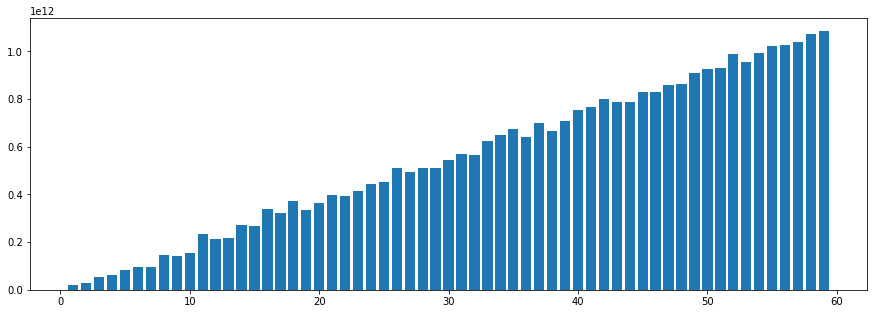

In [85]:
x = [i for i in range(1, 60)]
x_label = [i for i in range(1000, 60000, 1000)]
plt.close()
plt.figure(figsize=(15, 5))
plt.bar(x, sample_size)
#plt.xticks(x_label)
plt.show()

In [81]:
len(x)

59

In [66]:
file_sizes.sort(key=lambda tup: tup[0], reverse=True)
file_sizes[-2]

(4, 37968)

In [64]:
with open("/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small5fns-bysize-1000.txt", "w") as f:
    for p in file_sizes:
        f.write(pre+str(p[1])+"\n")

In [52]:
len(file_sizes)

10000

In [53]:
sum(file_sizes)

158287959678

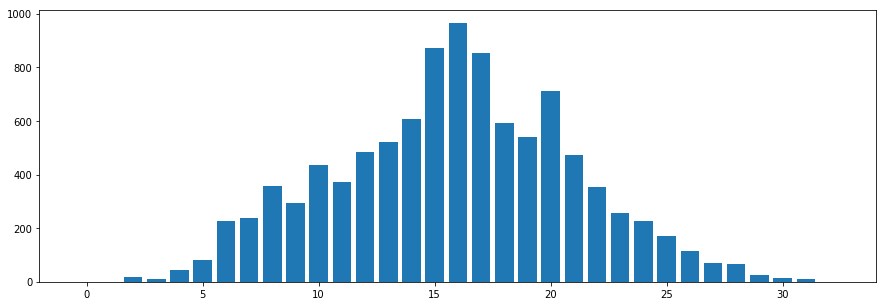

In [68]:
bin_size = [0] * 33
x = [i for i in range(0, 33)]
for size in file_sizes:
    bin_size[int(math.log(size[0], 2))] += 1
plt.close()
plt.figure(figsize=(15, 5))
plt.bar(x, bin_size)
plt.show()

In [74]:
file_ids.sort()
with open("/global/homes/y/yuanlai/workspace/DTNSpeedTest/mpi_fread_test/small5fns-size-ost-bysize-1000.txt", "w") as f:
    for i in file_ids:
        f_size = os.path.getsize(pre+str(i))
        result = subprocess.run(["lfs", "getstripe", pre+str(i)], stdout=subprocess.PIPE)
        match = re.search("lmm_stripe_offset:  (\d+)", str(result.stdout))
        f_ost = match.group(1)
        f.write(pre + str(i) + " " + str(f_size) + " " + f_ost + "\n")
f.close()